In [1]:
# ------------------------------------------------------------
# 📊 E-Commerce Sales Data - Exploratory Data Analysis (EDA)
# ------------------------------------------------------------

# 🧾 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styles
sns.set(style="whitegrid")
%matplotlib inline


In [ ]:
# 📥 Load the dataset
df = pd.read_csv("C:/Users/priya/OneDrive/Desktop/Data Analytics/ecommerce-sales-eda/Data/data.csv", encoding='latin1')

  # Make sure the path is correct
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [19]:
# 🧾 Dataset Structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [20]:
# 🧮 Statistical Summary
df.describe()


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [21]:
# 🧹 Check for missing values
df.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [23]:
# ✔️ Convert date columns to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,20.34


Q1: Which Products Generate the Most Sales?

📌 Insight: These are your best-selling products by revenue. Consider marketing them more or bundling them.

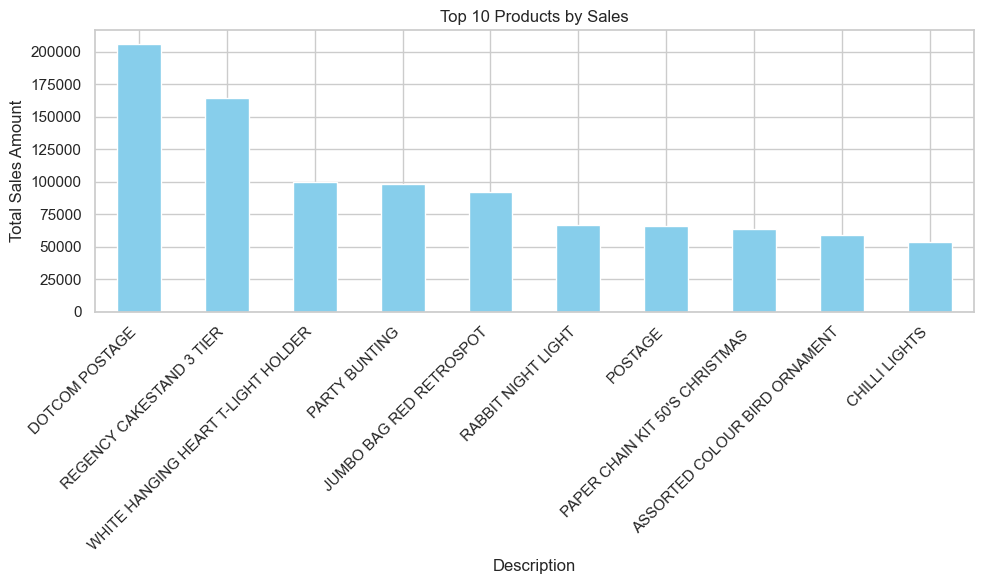

In [25]:
# Top 10 Products by Total Sales
top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='bar', figsize=(10,6), color='skyblue', title='Top 10 Products by Sales')
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Q2: Which Countries Contribute the Most to Revenue?

📌 Insight: UK is the main contributor. If targeting expansion, analyze the top 3 non-UK countries.

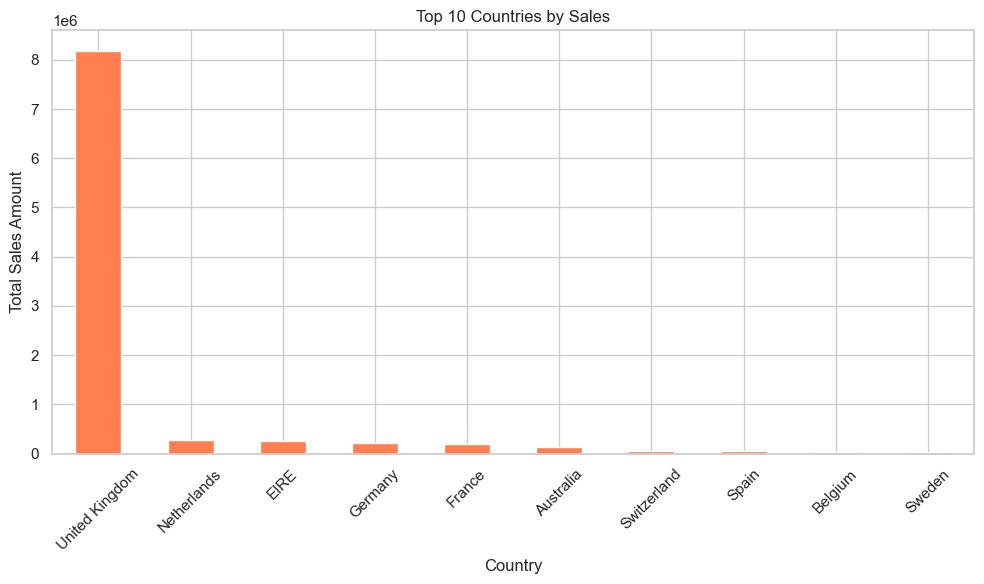

In [26]:
# Total sales by Country (Top 10)
top_countries = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

top_countries.plot(kind='bar', figsize=(10,6), color='coral', title='Top 10 Countries by Sales')
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Q3: Are There Seasonal Patterns in Sales?

📌 Insight: Sales spike during November–December. Indicates holiday shopping behavior.

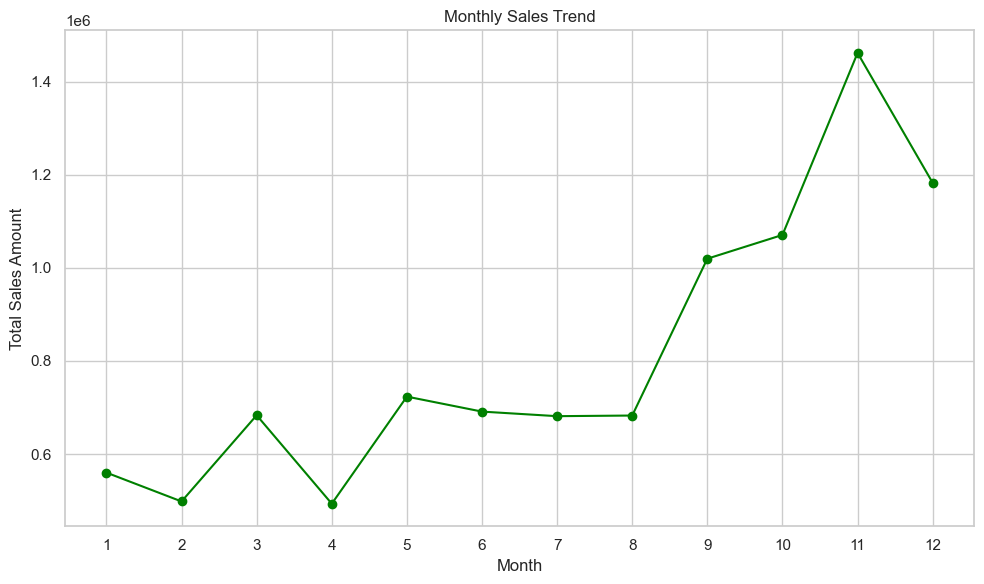

In [27]:
# Monthly Sales Trend
monthly_sales = df.groupby('Month')['TotalPrice'].sum()

monthly_sales.plot(kind='line', marker='o', figsize=(10,6), color='green', title='Monthly Sales Trend')
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.grid(True)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()


Q4: What is the Relationship Between Price and Quantity?

📌 Insight: Products with lower price tend to sell in higher quantities. Price elasticity is visible.

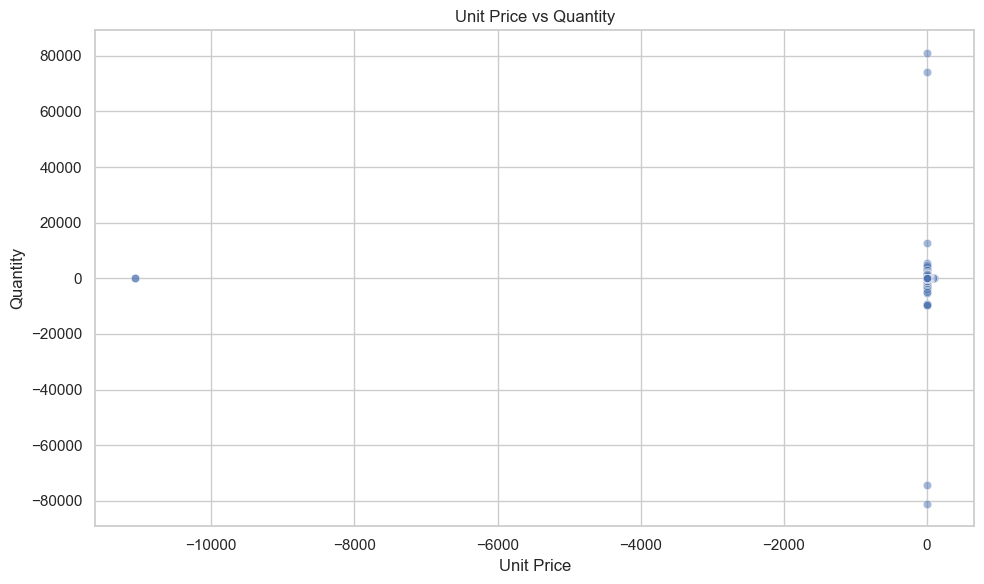

In [28]:
# Scatter plot: Unit Price vs Quantity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df['UnitPrice'] < 100], x='UnitPrice', y='Quantity', alpha=0.5)
plt.title('Unit Price vs Quantity')
plt.xlabel("Unit Price")
plt.ylabel("Quantity")
plt.grid(True)
plt.tight_layout()
plt.show()


Q5: Are There Any Outliers in Total Order Value?

📌 Insight: A few transactions have extremely high total value—could be bulk orders or errors.



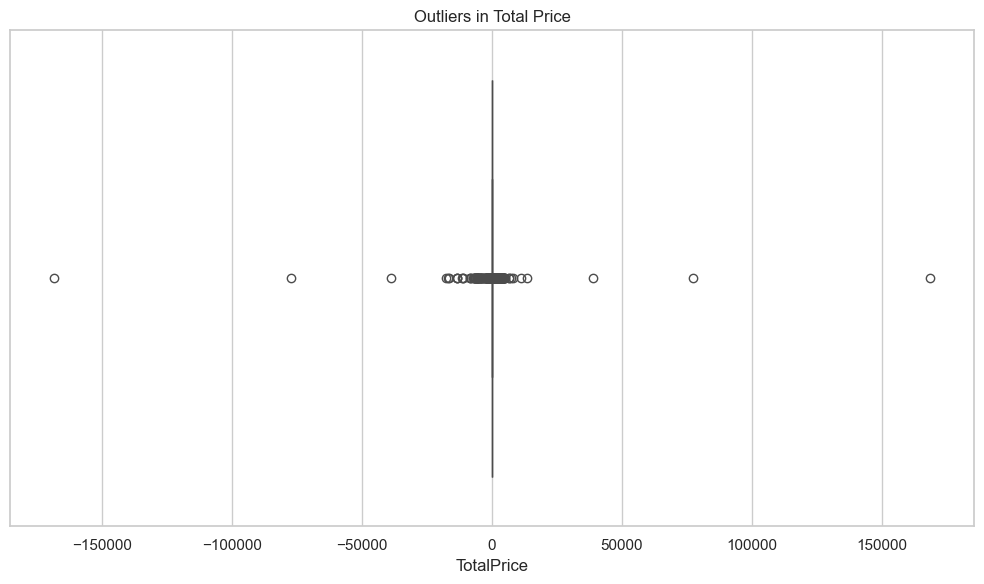

In [29]:
# Boxplot to detect outliers in TotalPrice
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['TotalPrice'])
plt.title("Outliers in Total Price")
plt.tight_layout()
plt.show()


Bonus: Which Customers Purchase the Most?

📌 Insight: These are VIP customers. Consider loyalty rewards or exclusive deals.

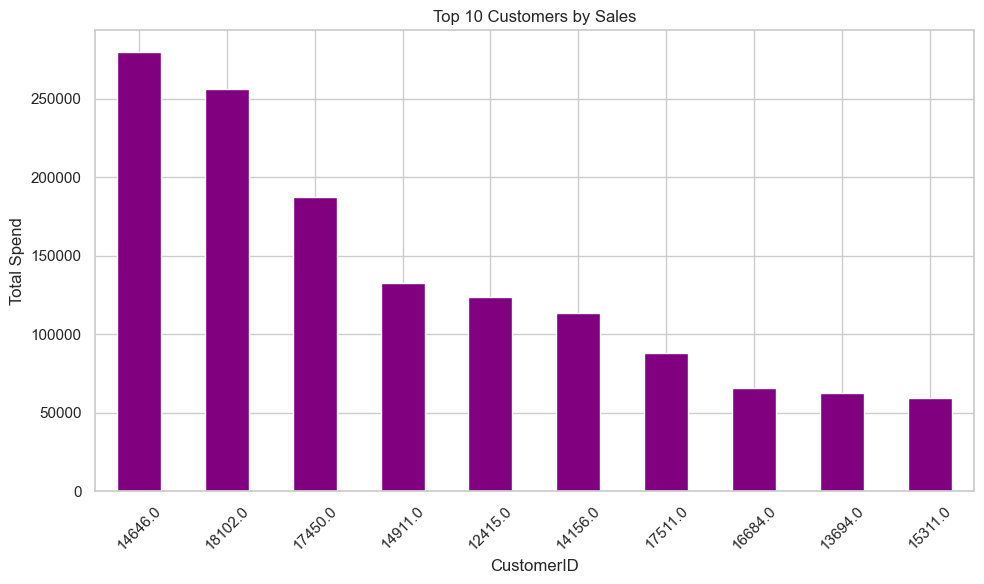

In [30]:
# Top 10 customers by total spend
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)

top_customers.plot(kind='bar', figsize=(10,6), color='purple', title='Top 10 Customers by Sales')
plt.ylabel("Total Spend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
